# Phase 2 – Préparation des données

Ce notebook :
1. télécharge le réseau routier complet de Montréal depuis OpenStreetMap ;
2. sérialise le graphe complet (`graph_full.pkl`) ;
3. extrait les 5 sous-graphes sectoriels (pickles + shapefiles) ;
4. fait un contrôle rapide (nombre de nœuds, arêtes et affichage d’un extrait).


In [1]:
from pathlib import Path
import pickle
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

RAW_DIR = Path("../data/raw")
PROC_DIR = Path("../data/processed")


## 1. Exécution du script `prepare_data.py`

> On relance ici le script pour être certain d’avoir les derniers fichiers.


In [2]:
%run ../src/data/prepare_data.py


Téléchargement du réseau routier de Montréal
Téléchargement terminé.
▶ Export Shapefile complet dans data/raw/montreal_roads/


/home/majdoub/Documents/ero_snow_removal/src/data/prepare_data.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(out_dir / "nodes.shp")
/home/majdoub/Documents/ero_snow_removal/scripts/.venv/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


Shapefile complet et  enregistré.
Graphe complet sérialisé data/processed/graph_full.pkl
🔎  Extraction des 5 sous-graphes sectoriels…
  • Outremont
    ▶ Export Shapefile dans data/raw/sectors/Outremont/
  • Verdun


/home/majdoub/Documents/ero_snow_removal/src/data/prepare_data.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(out_dir / "nodes.shp")
/home/majdoub/Documents/ero_snow_removal/scripts/.venv/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


    ▶ Export Shapefile dans data/raw/sectors/Verdun/
  • Anjou


/home/majdoub/Documents/ero_snow_removal/src/data/prepare_data.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(out_dir / "nodes.shp")
/home/majdoub/Documents/ero_snow_removal/scripts/.venv/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


    ▶ Export Shapefile dans data/raw/sectors/Anjou/
  • RDP-PAT


/home/majdoub/Documents/ero_snow_removal/src/data/prepare_data.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(out_dir / "nodes.shp")
/home/majdoub/Documents/ero_snow_removal/scripts/.venv/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


    ▶ Export Shapefile dans data/raw/sectors/RDP-PAT/
  • Plateau-Mont-Royal


/home/majdoub/Documents/ero_snow_removal/src/data/prepare_data.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(out_dir / "nodes.shp")
/home/majdoub/Documents/ero_snow_removal/scripts/.venv/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


    ▶ Export Shapefile dans data/raw/sectors/Plateau-Mont-Royal/
Sous-graphes sérialisés et shapefiles prêts.


/home/majdoub/Documents/ero_snow_removal/src/data/prepare_data.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(out_dir / "nodes.shp")
/home/majdoub/Documents/ero_snow_removal/scripts/.venv/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


## 2. Contrôle : graphe complet


In [3]:
with open(PROC_DIR / "graph_full.pkl", "rb") as f:
    G_full = pickle.load(f)

print(f"Nœuds : {G_full.number_of_nodes():,}")
print(f"Arêtes : {G_full.number_of_edges():,}")


Nœuds : 19,520
Arêtes : 48,867


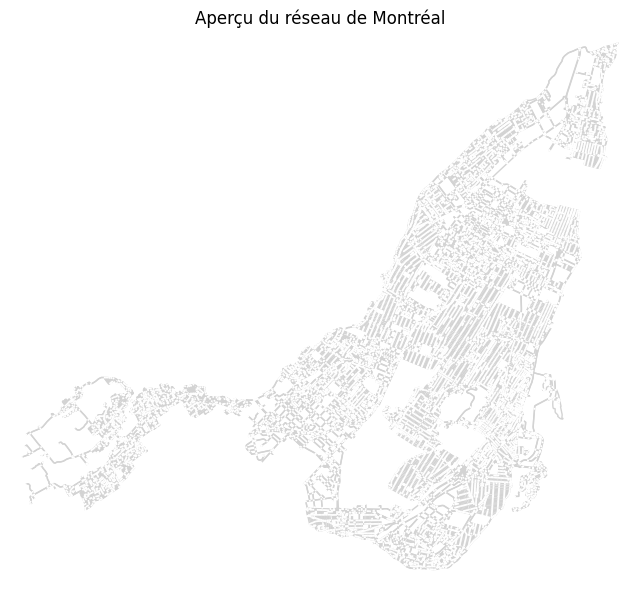

In [4]:
fig, ax = ox.plot_graph(
    G_full, node_size=2, edge_color="lightgray", bgcolor="white", show=False, close=False
)
ax.set_title("Aperçu du réseau de Montréal", fontsize=12)
plt.show()


## 3. Contrôle : un secteur


[Outremont]  Nœuds : 447  |  Arêtes : 1,101


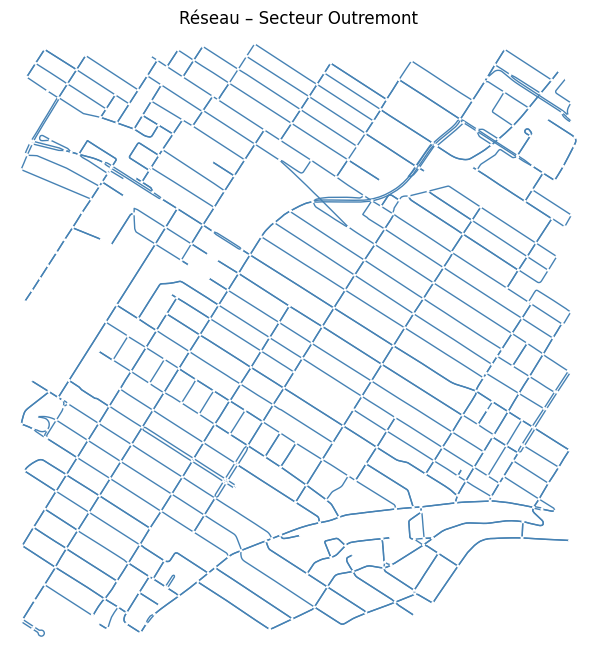

In [5]:
sect_name = "Outremont"
with open(PROC_DIR / f"graph_sector_{sect_name}.pkl", "rb") as f:
    G_sect = pickle.load(f)

print(f"[{sect_name}]  Nœuds : {G_sect.number_of_nodes():,}  |  Arêtes : {G_sect.number_of_edges():,}")

fig, ax = ox.plot_graph(
    G_sect, node_size=5, edge_color="steelblue", bgcolor="white",
    show=False, close=False
)
ax.set_title(f"Réseau – Secteur {sect_name}", fontsize=12)
plt.show()


## 4. Bilan

| Secteur | Nœuds | Arêtes |
|---------|-------|--------|
| (À compléter au fur et a mesure) | | |

Les shapefiles et pickles sont prêts dans **`data/raw/…`** et **`data/processed/…`**.  
Nous pouvons passer à la suite qui est  : *tournée drone (Chinese Postman)*.
